## USED CAR PRICE PREDICTION PROJECT

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor

import seaborn as sns
import os
os.getcwd()
df = pd.read_csv("audi.csv")
display(df)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [12]:
display(df.shape)
display(df.describe)

(10668, 9)

<bound method NDFrame.describe of       model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 c

In [13]:
# Checking for missing data
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [14]:
# Create X 
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display(pd.DataFrame(X).head(5))

# Create Y
Y = df.iloc[:,[2]].values
display (Y.shape)
display(pd.DataFrame(Y).head(5))


(10668, 8)

,0,1,2,3,4,5,6,7
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


(10668, 1)

,0
0,12500
1,16500
2,11000
3,16800
4,17300


Label Encoding Column – Model and Fuel Type

In [15]:
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
display (X)

array([[0, 2017, 'Manual', ..., 150, 55.4, 1.4],
       [5, 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [0, 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [2, 2020, 'Manual', ..., 150, 49.6, 1.0],
       [9, 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [9, 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

One hot Encoding to column – transmission

In [16]:
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))

(10668, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


In [18]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


## Random Forest Regressor

In [19]:
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)

# Prediction with Test Data 
y_pred = regression.predict(X_test)
display (y_pred)


C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [20]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[14337.15 14998.  ]
 [23450.35 21950.  ]
 [27330.07 28990.  ]
 ...
 [46275.18 45995.  ]
 [31359.   30500.  ]
 [ 9929.62  8400.  ]]


In [21]:
print  ('R2 Score ', r2_score(Y_test, y_pred)*100)
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  95.36134841307546
Mean Absolute Error 1538.730980670462


## Linear Regression

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
print(lin_reg)

LinearRegression()


array([[13121.75937793],
       [29393.75937793],
       [31873.75937793],
       ...,
       [42565.75937793],
       [31485.75937793],
       [ 7377.75937793]])

,0,1
0,13121.759378,14998.0
1,29393.759378,21950.0
2,31873.759378,28990.0
3,26765.759378,25489.0
4,31405.759378,30950.0
...,...,...
2129,41497.759378,23700.0
2130,20765.759378,18000.0
2131,42565.759378,45995.0
2132,31485.759378,30500.0


C:\Users\mohit\AppData\Local\Temp\ipykernel_20504\2785877983.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_act)


<Axes: ylabel='Density'>

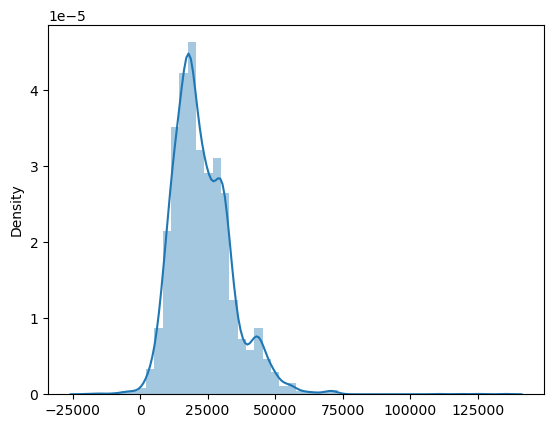

In [37]:
y_pred = lin_reg.predict(X_test)
display (y_pred)
pred_act = np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1)
display(pd.DataFrame(pred_act))
sns.distplot(pred_act)

In [38]:
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))
# Prediction for complete data set 
y_pred = lin_reg.predict(X)
display (y_pred)

# Display the Actual and predicted data ( the last clm is the predicted price for cars)

result = pd.concat([df,pd.DataFrame(y_pred)],axis=1)
display( result)


R2 Score  0.7915565638111468
Mean Absolute Error 3379.9270826343727


array([[14681.75937793],
       [20633.75937793],
       [13881.75937793],
       ...,
       [19449.75937793],
       [20965.75937793],
       [16737.75937793]])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14681.759378
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,20633.759378
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,13881.759378
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,19885.759378
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17397.759378
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,19237.759378
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,19321.759378
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,19449.759378
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20965.759378


## Extra  Trees  Regressor

In [42]:
ETM = ExtraTreesRegressor(n_estimators = 120)
ETM.fit(X_train,Y_train)
y_predict=ETM.predict(X_test)
print  ('R2 Score ', r2_score(Y_test, y_predict))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_predict))

# Display the Result 
y_pred = lin_reg.predict(X)
display (y_pred)
result = pd.concat([df,pd.DataFrame(y_pred)],axis=1)
display( result)



C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 Score  0.9558240552712887
Mean Absolute Error 1543.0181108768093


array([[14681.75937793],
       [20633.75937793],
       [13881.75937793],
       ...,
       [19449.75937793],
       [20965.75937793],
       [16737.75937793]])

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14681.759378
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,20633.759378
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,13881.759378
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,19885.759378
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17397.759378
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,19237.759378
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,19321.759378
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,19449.759378
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20965.759378
